Recalculate Rvar/Prot ages with new bin size

In [27]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

With Rvar and Prot

In [28]:
        
def testBin(df,f1,f2,teststari,bintemp,binprot,midtemp,midprot):
    df=df.reset_index(drop=True)
    Ntests=int(len(bintemp)*len(binprot))
    teff = df.iloc[teststari][f1]
    Prot = df.iloc[teststari][f2]
    KID = df.iloc[teststari]['KID']
    #print(teff,np.power(10.,Prot))
    
    delta_vz=np.zeros(Ntests)
    temp_a=np.zeros(Ntests)
    prot_a=np.zeros(Ntests)
    stars_inc=np.zeros(Ntests)
    
    maxtemp=max(bintemp)
    maxProt=max(binprot)
    mintemp=min(bintemp)
    minProt=min(binprot)
    
    count=0
    for i in range(len(bintemp)):
        for j in range(len(binprot)):
            if bintemp[i]==midtemp and binprot[j]==midprot:
                mask1=abs(df[f1].values-teff)<=bintemp[i]/2
                mask2=abs(df[f2].values-Prot)<=binprot[j]/2
                
                mask_c= (mask1 & mask2)
                
                NNstars=df.iloc[mask_c]
                
                # get the clossest stadrs v_b
                stars_inc[count]=len(NNstars)
                
                mad=np.median(abs(NNstars['v_b']-np.median(NNstars['v_b'])))
                vd_center=mad*1.5
                delta_vz[count]=mad*1.5
            else:
                NNstars=df.loc[abs(df[f1]-teff)<=bintemp[i]/2]
                NNstars=NNstars.loc[abs(NNstars[f2]-Prot)<=binprot[j]/2] 

                # get the clossest stadrs v_b
                stars_inc[count]=len(NNstars)

                mad=np.median(abs(NNstars['v_b']-np.median(NNstars['v_b'])))
                delta_vz[count]=mad*1.5
            
            count=count+1
            
    return KID, vd_center, np.std(delta_vz)



In [29]:
df_rvar=pd.read_pickle('NewData/RvarVP_MS_150_w015_bin_pc.pkl')
df_Prot=pd.read_pickle('NewData/ProtVP_MS_150_w015_bin_pc.pkl')

With only Rvar

# MS stars Rvar

In [30]:
#Calcdv(df_w,'teff_calc','Rvar',150)
midtemp=400
midprot=0.5

bintemps=[midtemp*0.6,midtemp,midtemp*1.2]
binprots=[midprot*0.6,midprot,midprot*1.2]

f=open('VD_bin_rvar','w+')
f.write('KID, vd, vd_err\n')
sys.stdout.flush()
for i in range(len(df_rvar)):
    update_progress(i/len(df_rvar))
    kid, vd, vd_err=testBin(df_rvar,'teff_calc','Rvar_log',i, bintemps,binprots,midtemp,midprot)
    f.write(str(kid)+','+str(vd)+','+str(vd_err)+'\n')
    sys.stdout.flush()
    f.flush()
    
#Calcdv(df_w,'teff_calc','Rvar',150)

Progress: [####################] 100.0%


In [31]:
df_rvar_bin=pd.read_table('VD_bin_rvar',delimiter=',')
df_rvar_bin=pd.merge(df_rvar[[i for i in df_rvar.columns if i not in [' vd',' vd_err']]],
                     df_rvar_bin,left_on='KID',right_on='KID',how='inner')
df_rvar_bin

,solution_id,designation,source_id,random_index,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,...,G_dered,teff_calc,v_t,v_b,abs_G,Rvar_log,age,age_err,vd,vd_err
0,1.635721e+18,Gaia DR2 2050231848829944320,2.050232e+18,2.980325e+08,2015.5,291.137620,0.019560,36.577344,0.025196,1.168913,...,14.829724,5313.795979,33.889670,-33.411547,5.517761,4.335097,3.169943,0.805763,10.516814,0.135130
1,1.635721e+18,Gaia DR2 2050233940470191872,2.050234e+18,1.444712e+09,2015.5,291.063824,0.269798,36.635671,0.391992,3.008085,...,13.857812,3783.045568,43.610090,-23.237122,6.280831,4.034140,4.048766,0.625721,14.535594,0.272751
2,1.635721e+18,Gaia DR2 2050232364226074624,2.050232e+18,1.045593e+09,2015.5,291.141664,0.030849,36.648235,0.033753,1.123321,...,15.685258,5058.354128,49.088081,-4.214296,6.159685,3.505987,4.666500,0.528942,18.637633,0.367074
3,1.635721e+18,Gaia DR2 2050235731480463616,2.050236e+18,2.819596e+08,2015.5,291.153283,0.060792,36.678799,0.069757,1.499367,...,14.915128,4898.417653,43.437266,36.144482,5.998116,3.252893,4.925885,0.874615,21.935564,0.356810
4,1.635721e+18,Gaia DR2 2050232776542967680,2.050233e+18,6.823268e+08,2015.5,291.163064,0.025876,36.674193,0.030111,1.239068,...,15.486587,5059.657160,91.357351,26.448217,6.161795,3.464520,4.717011,0.595779,19.362923,0.295691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88556,1.635721e+18,Gaia DR2 2139336408576560512,2.139336e+18,1.389496e+09,2015.5,289.921973,0.021650,52.406373,0.022294,0.787841,...,14.936403,5347.731327,25.186284,-10.180756,4.676241,3.255194,4.896960,0.541853,20.311940,0.184454
88557,1.635721e+18,Gaia DR2 2139336099338925312,2.139336e+18,2.699998e+08,2015.5,289.964228,0.023087,52.424308,0.025331,0.669294,...,14.948032,6043.922841,77.666784,4.480242,4.376738,3.309001,4.455203,0.233419,17.857717,0.169660
88558,1.635721e+18,Gaia DR2 2139341768695774336,2.139342e+18,1.626857e+09,2015.5,290.033980,0.031699,52.439817,0.030193,1.052836,...,15.558916,5044.668752,3.918576,-0.407244,5.892401,4.028109,4.025700,1.797243,12.005128,0.207024
88559,1.635721e+18,Gaia DR2 2139341906134738432,2.139342e+18,2.558871e+08,2015.5,290.058448,0.026208,52.453856,0.026837,0.807338,...,15.316444,5305.874615,90.360351,-43.141154,5.102241,3.525812,4.670826,0.310800,18.222421,0.612838


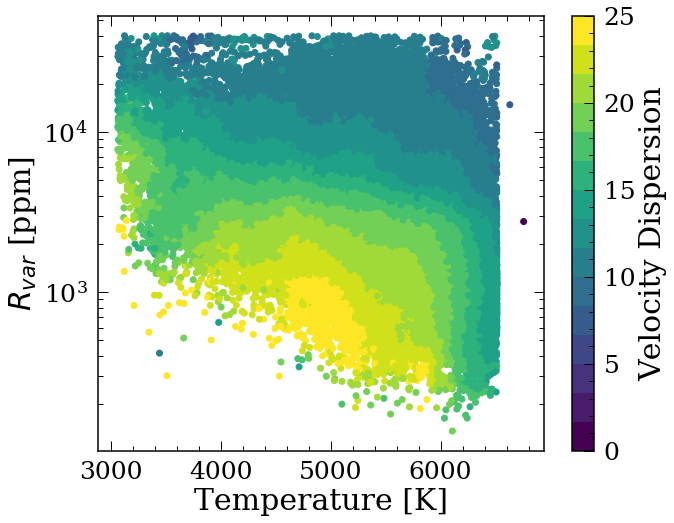

In [32]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_rvar_bin['teff_calc'],df_rvar_bin['Rvar'],c=df_rvar_bin[' vd'],cmap=cm,vmin=0,vmax=25)
cb=plt.colorbar()
#plt.ylim([0,50000])
cb.set_label('Velocity Dispersion')
plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('$R_{var}$ [ppm]')
plt.savefig('RvarVD.png')

# MS stars Prot

In [33]:
#Calcdv(df_w,'teff_calc','Rvar',150)
midtemp=550
midprot=0.03

bintemps=[midtemp*0.6,midtemp,midtemp*1.2]
binprots=[midprot*0.6,midprot,midprot*1.2]

f=open('VD_bin_prot','w+')
f.write('KID, vd, vd_err\n')
sys.stdout.flush()
for i in range(len(df_Prot)):
    update_progress(i/len(df_Prot))
    kid, vd, vd_err=testBin(df_Prot,'teff_calc','Prot_log',i, bintemps,binprots,midtemp,midprot)
    f.write(str(kid)+','+str(vd)+','+str(vd_err)+'\n')
    sys.stdout.flush()
    f.flush()
    
#Calcdv(df_w,'teff_calc','Rvar',150)

Progress: [####################] 100.0%


In [42]:
df_prot_bin=pd.read_table('VD_bin_prot',delimiter=',')
df_prot_bin=pd.merge(df_Prot[['KID','Rvar','teff_calc','Prot']],df_prot_bin,left_on='KID',right_on='KID',how='inner')
df_prot_bin

,KID,Rvar,teff_calc,Prot,vd,vd_err
0,1026146,11429.357529,4294.608486,14.891,10.248009,1.086661
1,1026474,67562.371492,4028.989654,1.569,42.239950,17.949421
2,1164102,2368.494868,4052.501496,31.496,23.388488,0.803326
3,1292688,3567.308187,3751.604865,42.659,21.163480,1.603520
4,1297303,6550.490856,4318.497349,27.333,17.428481,0.648533
...,...,...,...,...,...,...
21365,12644900,1584.625244,6195.350551,11.187,9.426865,0.554362
21366,12645046,1819.634438,5855.374964,20.996,12.360775,0.338658
21367,12735784,3754.758835,5377.876227,26.979,14.406367,0.580351
21368,12884110,3635.424376,5100.837862,10.600,8.121565,0.377990


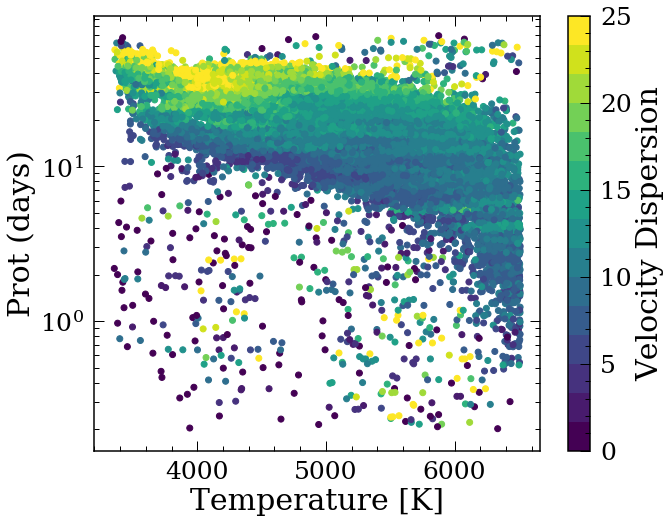

In [43]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_prot_bin['teff_calc'],df_prot_bin['Prot'],c=df_prot_bin[' vd'],cmap=cm,vmin=0,vmax=25)
cb=plt.colorbar()
#plt.ylim([0,50000])
cb.set_label('Velocity Dispersion')
plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('Prot (days)')
plt.savefig('Prot.png')